In [1]:
import matplotlib.pyplot as plt

### Figure and Axes.

- Figure: Thing of `figure` as the canvas of your visual. This canvas will contain everything you wish to put into your plot.
- Axes: Second most important element in matplotlib, since it defines the actual area where the data will be rendered.

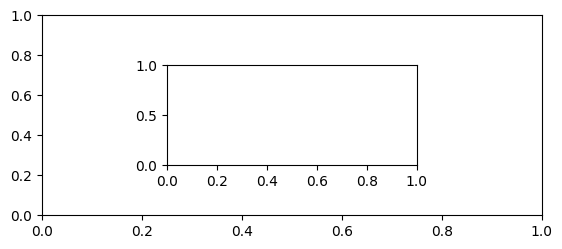

In [2]:
fig = plt.figure(figsize=(5, 2))
ax = fig.add_axes(
    # The rect parameter specifies the dimension and positions of our axes.
    rect=[0,0,1,1]
)

ax2 = fig.add_axes(
    rect=[.25, .25, .5, .5]
)

It is usually more convenient to add multiple `axes` via the `subplot` method - which is essentially another way of calling `axis` in matplotlib.

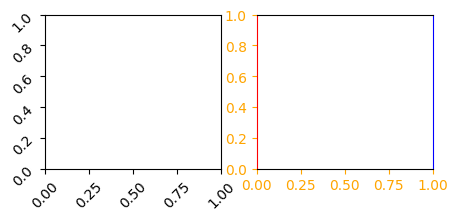

In [3]:
fig = plt.figure(figsize=(5, 2))

"""
The position of the subplot described by one of three integers (nrows, ncols, index).
The subplot will take the index position on a grid with nrows rows and ncols columns.
The index starts at 1 in the upper left corner and increases to the right.
"""

ax = plt.subplot(121)
ax2 = plt.subplot(122)

"""
The beauty of having multiple `axes` on the same figure is that they are entirely independent.
For example, we can customize our second axes (ax2) to have a different edge color on its \
ticks and spines (the lines noting the data area boundaries) and out first axes (ax1) to 
have rotated tick labels.
"""

ax.tick_params(labelrotation=45)

# Customizing ax2.
ax2.spines['right'].set_color('blue')
ax2.spines['left'].set_color('red')
ax2.tick_params(color="orange", labelcolor="orange")


### The `subplot_mosaic` method.

One of the matplotlib's great features is the `subplot_mosaic` method, which allows \
us to easily specify the position of our axes in a very intuitive way. \
This method takes as input a list of strings that label the `axes` within our figure in a visual layout. \

For example, let's say we're interested in created in visual with an area for the title of our plot, \
a club's logo, and a bar chart. We could then specify the following list and pass it to the `subplot_mosaic` methof to get the desired result.

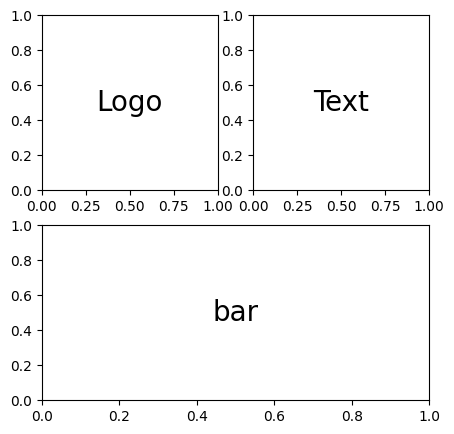

In [4]:
# 4 elements: 2 rows and 2 columns.
layout = [
    ["logo", "text"],
    ["bar", "bar"],
]

# Figure (The canvas)
fig = plt.figure(figsize=(5, 5))

ax_dict = fig.subplot_mosaic(layout)

ax_dict['logo'].annotate(
    xy=(.5, .5),
    text="Logo",
    ha="center",
    va="center",
    size=20
)

ax_dict['text'].annotate(
    xy=(.5, .5),
    text="Text",
    ha="center",
    va="center",
    size=20
)

ax_dict['bar'].annotate(
    xy=(.5, .5),
    text="bar",
    ha="center",
    va="center",
    size=20
)

plt.show()

## Playing With Data.

In [5]:
season = ["2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021"]
points = [43, 42, 52, 50, 67, 71, 89, 78, 86, 79, 66, 78, 100, 98, 81, 86, 93]

In [6]:
import matplotlib.ticker as ticker
from PIL import Image
import urllib

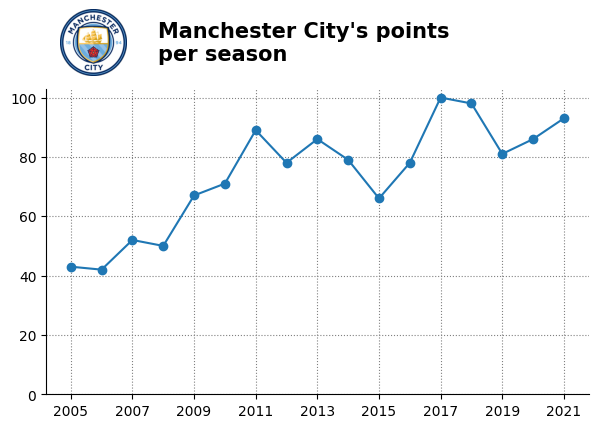

In [7]:
fig = plt.figure(figsize=(7, 5))

layout = [["logo"] + ["text"] * 4,
          ["bar"] * 5,
          ["bar"] * 5,
          ["bar"] * 5,
          ["bar"] * 5]

ax_dict= fig.subplot_mosaic(
    layout
)

fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"
club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{8456:.0f}.png"))

# Logo image and Turning of axis.
ax_dict['logo'].imshow(club_icon)
ax_dict['logo'].axis("off")

# Adding Title
ax_dict['text'].annotate(
    xy=(0, .5),
    text="Manchester City's points\nper season",
    ha="left",
    va="center",
    weight="bold",
    size=15
)
ax_dict['text'].axis("off")

# Add the bar chart.
ax_dict['bar'].plot(season, points, marker= "o")
ax_dict['bar'].xaxis.set_major_locator(ticker.MultipleLocator(2))

# Customize the "Bar" ax.
ax_dict['bar'].spines['top'].set_visible(False)
ax_dict['bar'].spines['right'].set_visible(False)
ax_dict['bar'].set_ylim(0)
ax_dict['bar'].grid(visible=True, ls=":", color="gray")

plt.show()

## The co-ordinate system of matplotlib.

Matplotlib has two most important co-ordinate systems being
1. Figure
2. Data Coordinates

To make things even complex, each system has a normalized and native version \
that allows you to control the positioning of the plot's elements in different ways.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.transforms import ScaledTranslation

from PIL import Image
import urllib
import os

## Figure Dimensions

Knowing the actual size of your plot (in pixels), is actually pretty important. \
For example, knowing the "pixel size" of your plot is essential to secure that the text \
in your visual doesn't look too small, or too big; or that you don't create unnecessary huge figures.


#### So here's how it works:

- When you creat the `figure` the `figsize` parameter specifies the dimensions of your figures in ___inches___.
- The `dpi` parameter denotes the dots per inch of your `figure`, where a higher `dpi` results in a higher resolution.

The dimensions of the figure (in pixels) will be the `dpi` times the width and height of the plot. \
For example, the following code creates $1500x1500$ sized picture since we assign a dpi of $300$ and \
a `figsize=(5,5)`


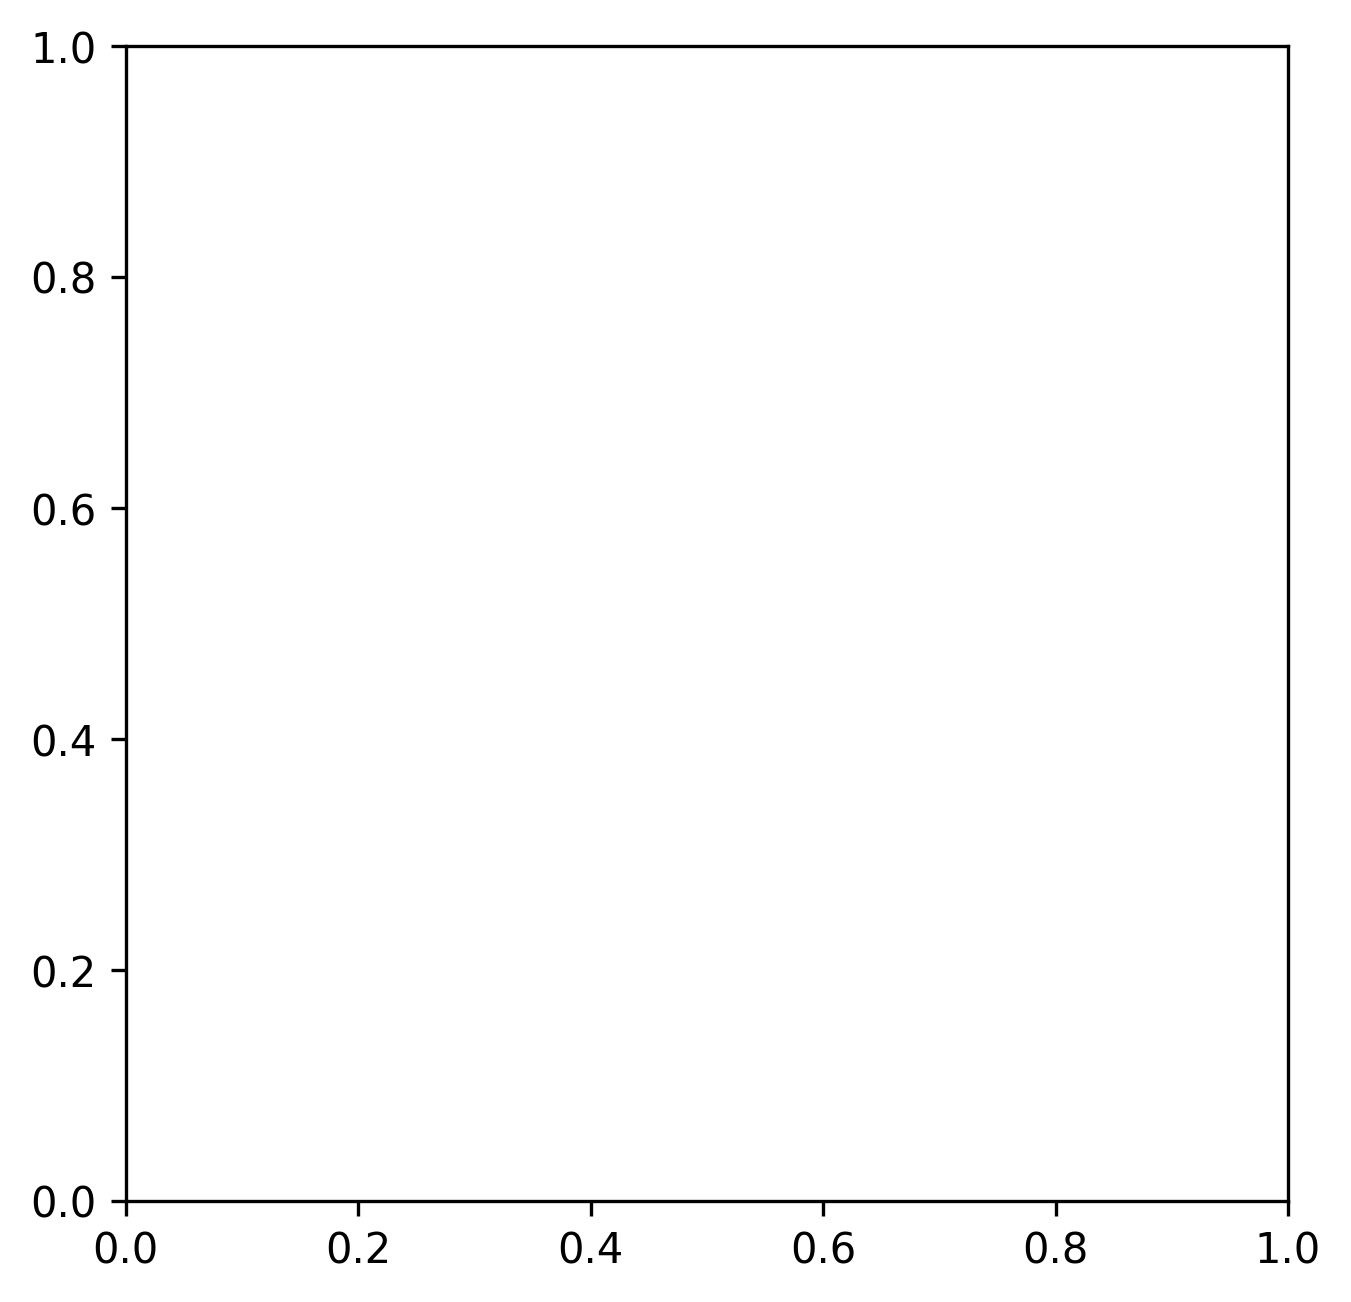

In [9]:
fig = plt.figure(figsize=(5, 5), dpi=300)
ax = plt.subplot()

## The Data Coordinate System

The data coordinate system's native version is expressed in terms of the data. \
That is, it depends on the actual _x_ and _y_ limits of your plot's _axes_. \
On the other hand, it maps the width and height of the __axes__ to a scale of \
between $0$ and $1$ in its normalized version.

The normalized version is uesful as it allows us to specify the position of certain elements within
the `axes`, without having to worry about the underlying data of our visualization.

Text(0.4, 0.2, 'This text is placed using\nnormalized data coordinates.')

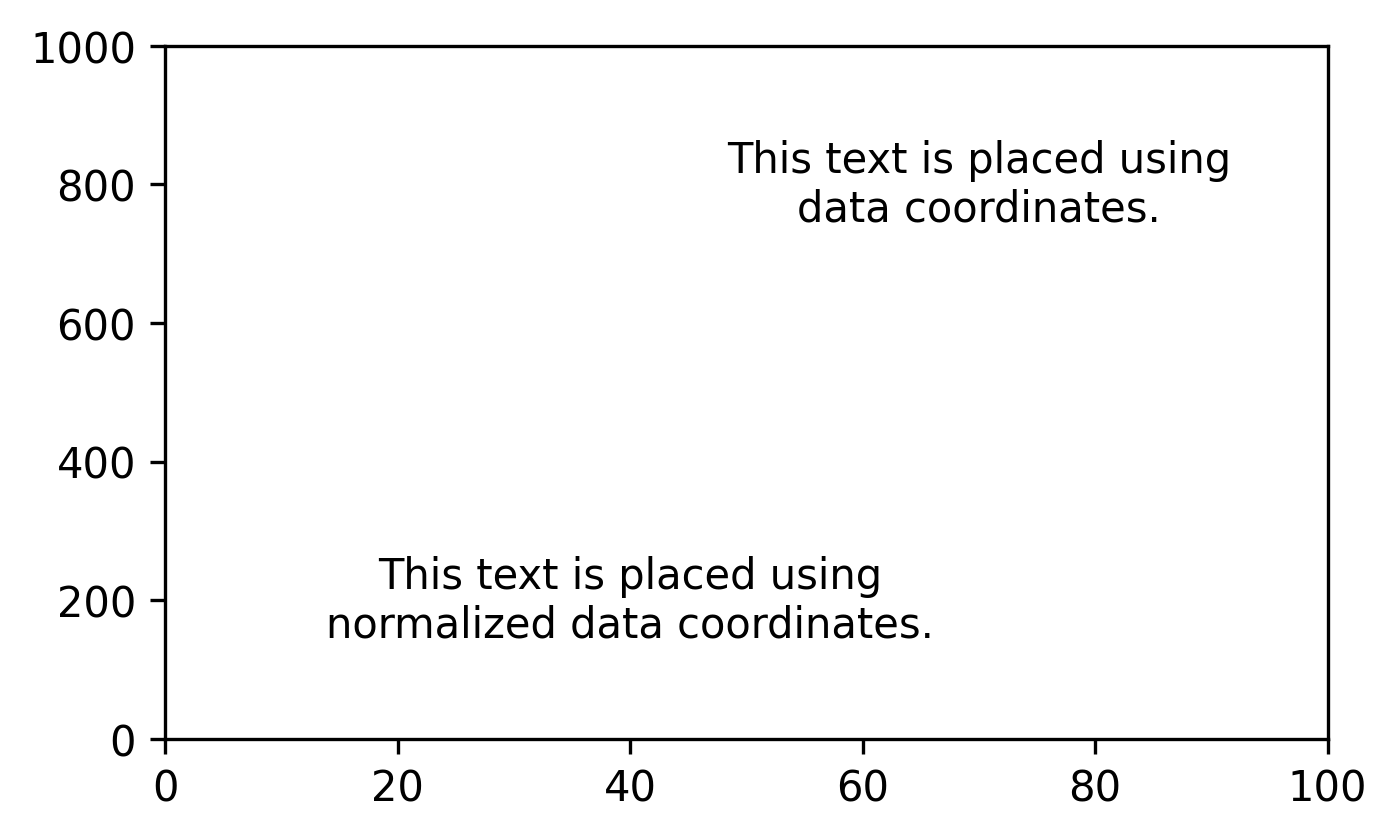

In [10]:
fig = plt.figure(figsize=(5, 3), dpi=300)
ax = plt.subplot()

ax.set_xlim(0, 100)
ax.set_ylim(0, 1000)

# Annotations.
ax.annotate(
    xy=(70, 800),
    text="This text is placed using\ndata coordinates.",
    ha="center",
    va="center"
)

ax.annotate(
    xy=(.4, .2),
    text="This text is placed using\nnormalized data coordinates.",
    ha='center',
    va='center',
    xycoords='axes fraction',
)

## The Figure Coordinate System.

Figure system is specified in terms of pixels (in its native version) and \
Maps the width and height of the `figure` to a scale of $0$ to $1$ in its normalized version.
\
Similar to data coordinate system, the figure coordinate provide a useful method to place \
certain elements of our plot, depending on the use case.

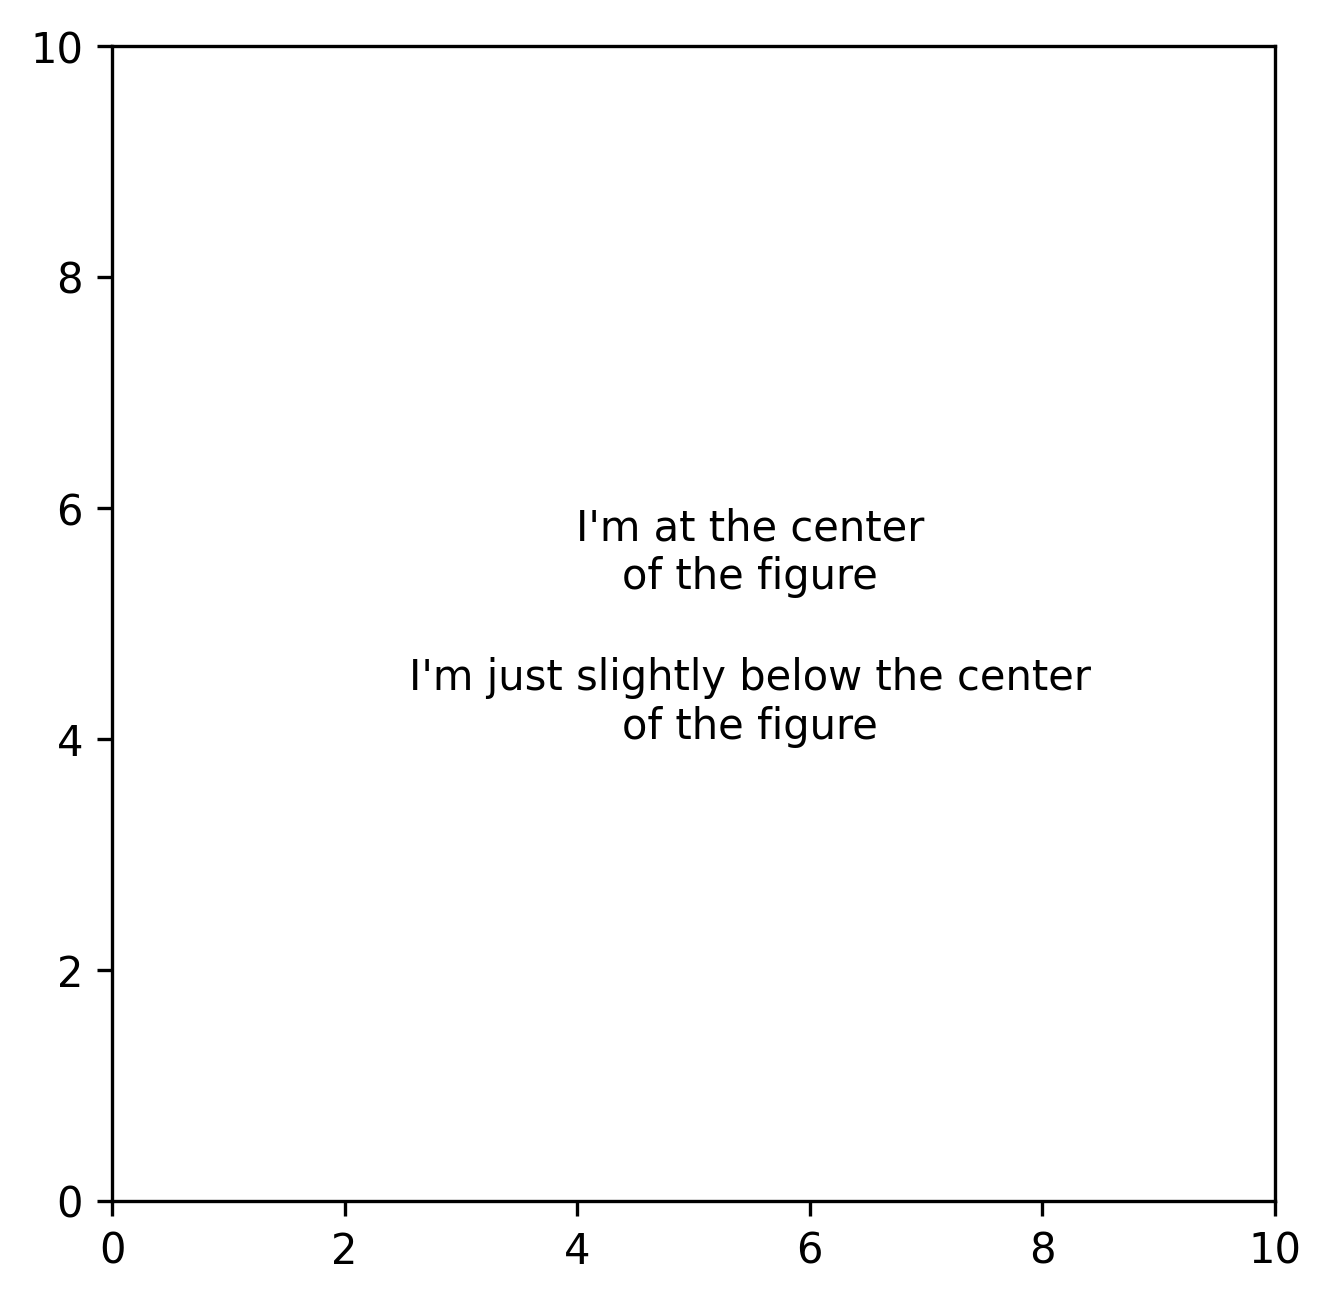

In [15]:
"""
A figure of dimensions of 5 inches wide and 5 inches high
Dots per inch of 300 (dpi) -- these are equivalent to pixels
So our figure is 1500 x 1500 pixels.
"""

fig = plt.figure(figsize=(5, 5), dpi=300)
ax = plt.subplot()

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

ax.annotate(
    xy=(750, 750),
    text="I\'m at the center\nof the figure",
    xycoords='figure pixels',
    ha='center',
    va='center',
)

ax.annotate(
    xy=(.5, .4),
    text="I\'m just slightly below the center\nof the figure",
    xycoords='figure fraction',
    ha='center',
    va='center',
)


plt.show()

## Logos as Scatter Plots

In [79]:
def ax_logo(team_id, ax):
    """
    Plots the logo of the team at a specific axes.
    """
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{team_id:.0f}.png'))
    ax.imshow(club_icon)
    ax.axis('off')
    return ax

### Transformation methods.

- `ax.transData.transform` takes _data coordinates and transforms them into figure coordinates_ a.k.a ___pixels___.
- the `fig.transFigure.inverted().transform` method which _takes figure coordinates (pixels) and transforms them into normalized figure coordinates_ that is, relative position within the figure.
\
\
An important thing to mention here is that since both of these methods come from \
___figure (fig)___ & ___axes (ax)___ objects they need to be called once the \
`figure` and `axes` have been defined. 

Data coordinates (x,y) = (2.5,1) in pixels: 
(768.75, 297.0)
Pixel coordinates (x,y) = (768.75, 297.0) in figure fraction: 
(0.51, 0.50)


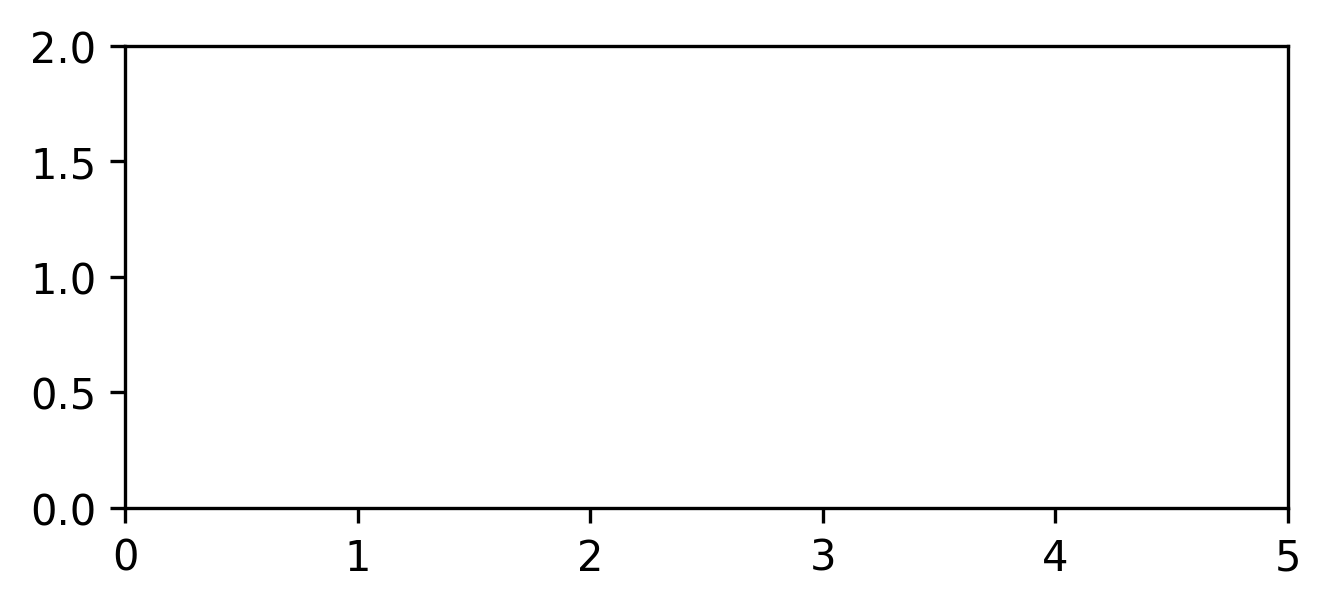

In [19]:
fig = plt.figure(figsize=(5, 2), dpi=300)
ax=plt.subplot(111)

ax.set_xlim(0, 5)
ax.set_ylim(0, 2)

# Transform funcitons.
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform

pixel_coords = DC_to_FC((2.5, 1))
figure_fraction_coords = FC_to_NFC(pixel_coords)

print(
f'''Data coordinates (x,y) = (2.5,1) in pixels: 
({pixel_coords[0]}, {pixel_coords[1]})'''
)
print(
f'''Pixel coordinates (x,y) = ({pixel_coords[0]}, {pixel_coords[1]}) in figure fraction: 
({figure_fraction_coords[0]:.2f}, {figure_fraction_coords[1]:.2f})'''
)


#### Generating Random data.

In [22]:
import numpy as np

In [53]:
np.random.seed(120)
x_loc = np.random.uniform(0.1, .9, 10)
y_loc = np.random.uniform(0.1, .9, 10)

In [63]:
x_loc

array([0.64236444, 0.51036704, 0.59896457, 0.48171397, 0.46820785,
       0.86069189, 0.88766048, 0.78353804, 0.57287228, 0.2625571 ])

#### PLotting the figure

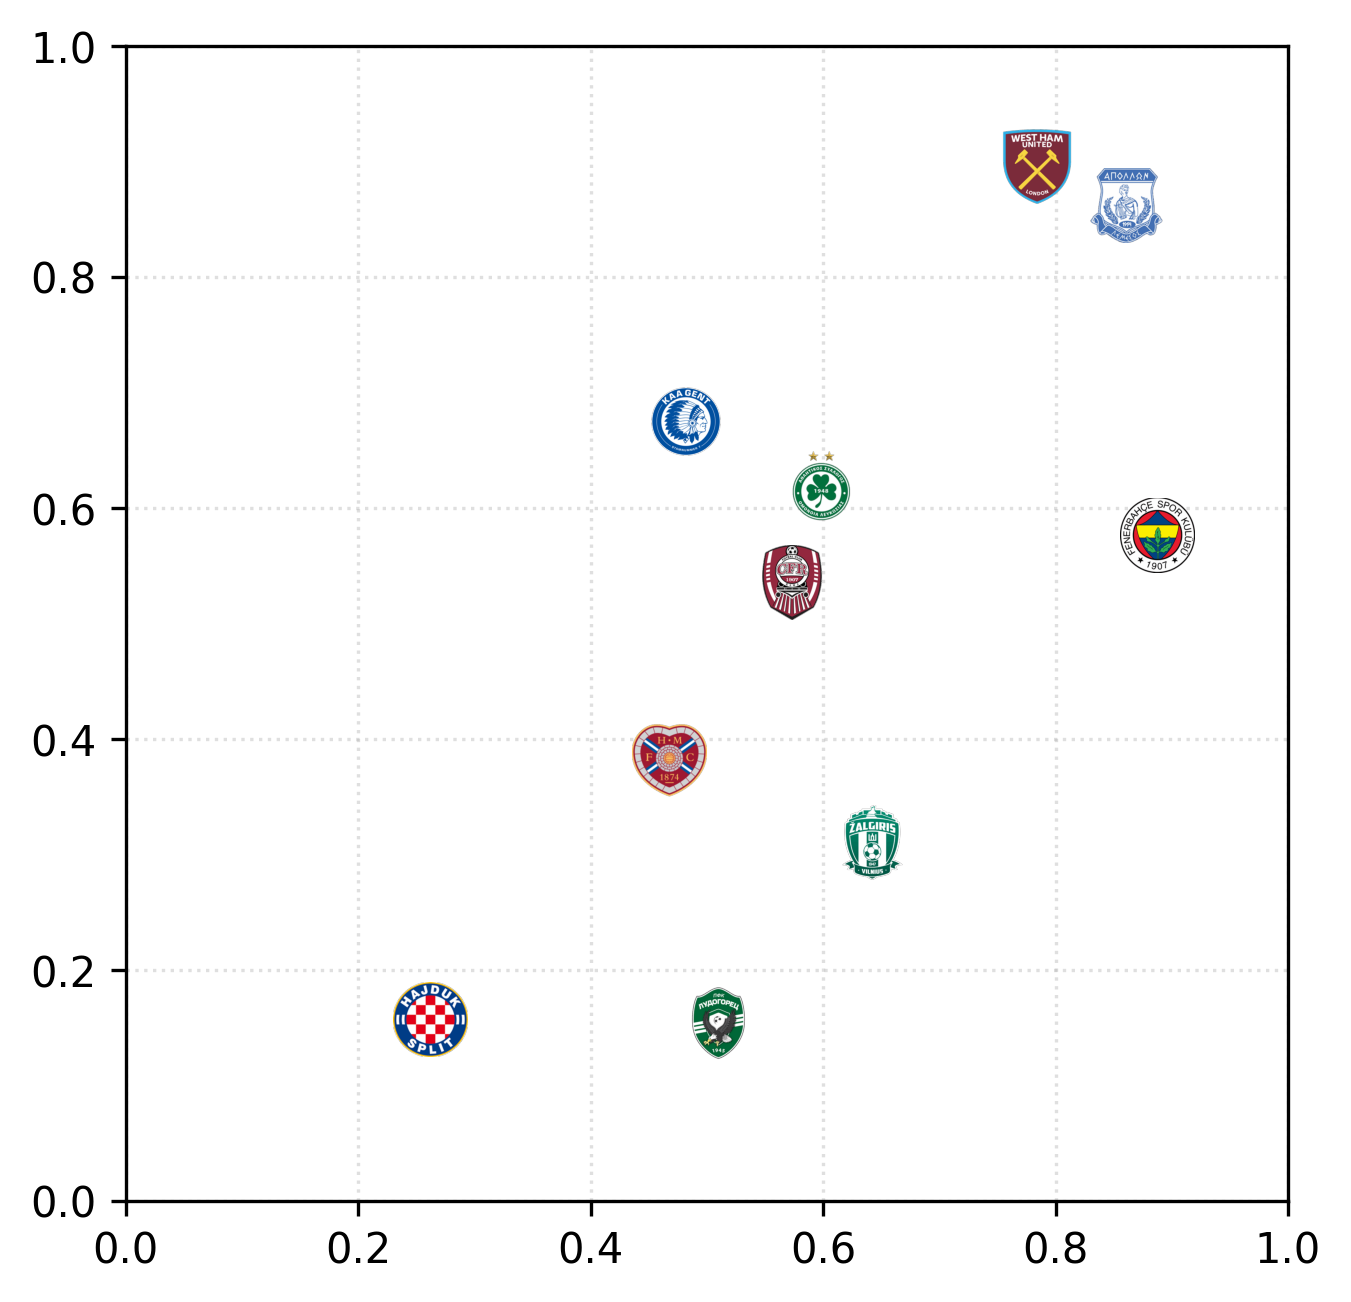

In [56]:
fig = plt.figure(figsize=(5,5), dpi=300)
ax = plt.subplot(111)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# -- Transformation functions
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

ax_size = 0.05

counter = 0
for x,y in zip(x_loc, y_loc):
    ax_coords = DC_to_NFC((x,y))
    image_ax = fig.add_axes(
        [ax_coords[0] - ax_size/2, ax_coords[1] - ax_size/2, ax_size, ax_size],
         fc='None'
    )
    ax_logo(clubs[counter], image_ax)
    counter += 1

ax.grid(ls=":", alpha=0.4)    
plt.show()

In [80]:
clubs

[4616, 210173, 8044, 9991, 9860, 8003, 8695, 8654, 9731, 10154]

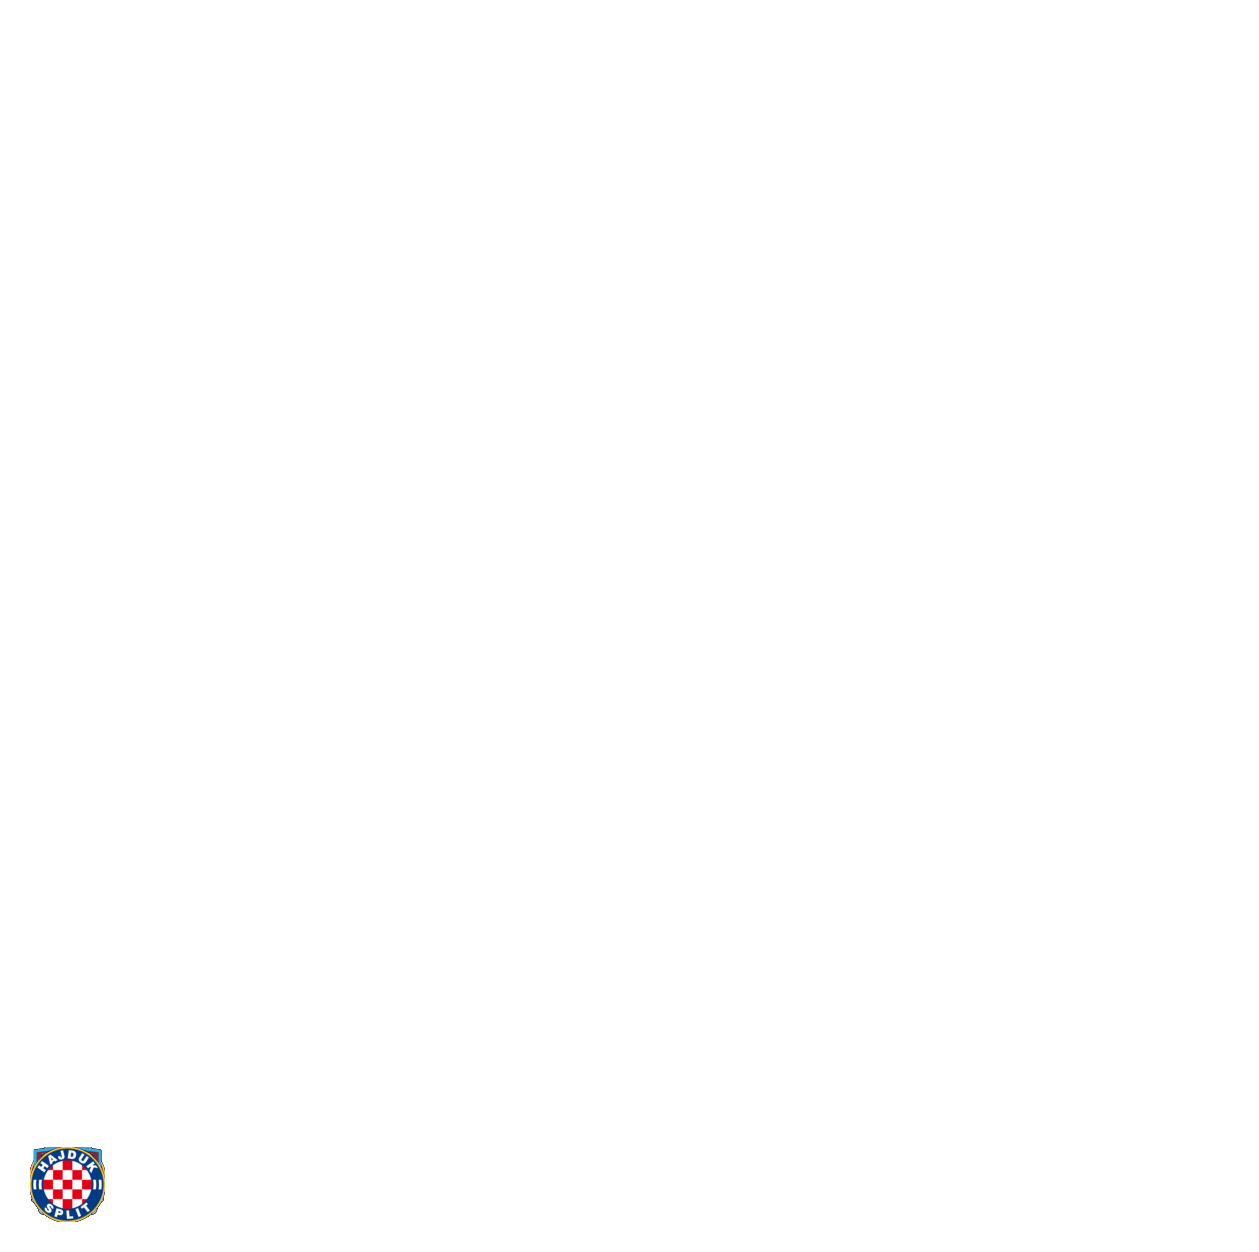

In [96]:
fig = plt.figure(figsize=(5,5), dpi=300)
ax = plt.subplot(111)

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.axis('off')

# -- Transformation functions
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC =lambda x: FC_to_NFC(DC_to_FC(x))

ax_size=0.05

for i in range(10):
    for j in range(10):

plt.show()